In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor

from useful_functions import load_transform_split, scatter_resid, scatter_predvreal

#### Load data, clean, split into training/testing, etc.

In [14]:
X_train,X_test,y_train,y_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                              expand=False,
                                                              clean=True,
                                                              split=0.2,
                                                              return_pipeline=True,
                                                              fmt='numpy',
                                                              random_state=42)
print(X_train.shape,X_test.shape)

(57656, 19) (14414, 19)


#### Try a test neural net.

In [3]:
model = keras.models.Sequential([
    keras.layers.Dense(20,activation='tanh',input_shape=[X_train.shape[1]]),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='relu'),
])
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)
print("Training MSE: %.2f, Testing MSE: %.2f"%(
      mean_squared_error(model.predict(X_train),y_train),
      mean_squared_error(model.predict(X_test),y_test)))

Train on 46124 samples, validate on 11532 samples
Epoch 1/10
46124/46124 [==============================] - 8s 175us/sample - loss: 3.4488 - val_loss: 2.5464
Epoch 2/10
46124/46124 [==============================] - 7s 155us/sample - loss: 2.5754 - val_loss: 2.1764
Epoch 3/10
46124/46124 [==============================] - 8s 182us/sample - loss: 2.2591 - val_loss: 2.0433
Epoch 4/10
46124/46124 [==============================] - 9s 202us/sample - loss: 2.1016 - val_loss: 2.0160
Epoch 5/10
46124/46124 [==============================] - 8s 184us/sample - loss: 2.0000 - val_loss: 1.9941
Epoch 6/10
46124/46124 [==============================] - 8s 167us/sample - loss: 1.9361 - val_loss: 1.9609
Epoch 7/10
46124/46124 [==============================] - 9s 198us/sample - loss: 1.8775 - val_loss: 1.9880
Epoch 8/10
46124/46124 [==============================] - 7s 144us/sample - loss: 1.8412 - val_loss: 1.8789
Epoch 9/10
46124/46124 [==============================] - 8s 174us/sample - loss: 1.82

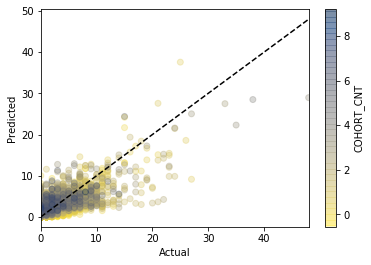

In [6]:
#Compare predicted N_drop vs. actual N_drop.
y_pred = model.predict(X_test)[:,0]
scatter_predvreal(y_test,y_pred,colorby=X_test[:,0]) #Color by scaled COHORT_CNT

#### Try Linear Regression

In [15]:
model = LinearRegression()
model.fit(X_train,y_train)
print("Training MSE: %.2f, Testing MSE: %.2f"%(
      mean_squared_error(model.predict(X_train),y_train),
      mean_squared_error(model.predict(X_test),y_test)))

Training MSE: 3.58, Testing MSE: 3.52


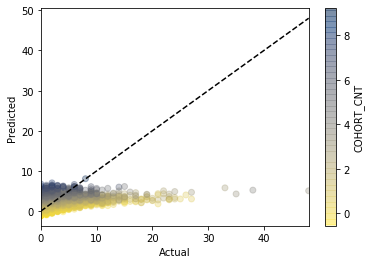

In [16]:
#Compare predicted N_drop vs. actual N_drop.
y_pred = model.predict(X_test)[:,0]
scatter_predvreal(y_test,y_pred,colorby=X_test[:,0]) #Color by scaled COHORT_CNT